<a href="https://colab.research.google.com/github/hayat415/Batch-35-assignment-1-quater-2/blob/master/CarPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv


In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD 
import seaborn as sns
import matplotlib.pyplot as plt

import io
data=pd.read_csv(io.BytesIO(uploaded["CarPrice_Assignment.csv"]))
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [35]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [67]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [68]:
data['doornumber'].unique()

array([2, 4])

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])


In [40]:
data['doornumber']=data['doornumber'].map({'two':2, 'four':4})

In [80]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,0,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,0,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,0,0,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,0,0,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,0,0,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,0,0,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


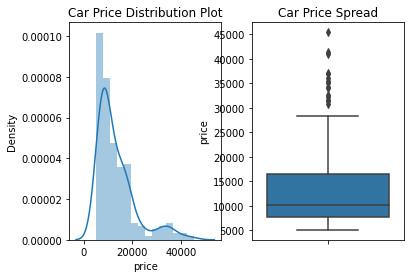

In [100]:
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [97]:
data1=data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength','wheelbase','drivewheel','price','enginelocation']]

In [82]:
data1

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,0,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,0,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,0,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,0,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0
...,...,...,...,...,...,...,...,...,...,...
200,114,3.78,141,2952,68.9,188.8,109.1,0,16845.0,0
201,160,3.78,141,3049,68.8,188.8,109.1,0,19045.0,0
202,134,3.58,173,3012,68.9,188.8,109.1,0,21485.0,0
203,106,3.01,145,3217,68.9,188.8,109.1,0,22470.0,0


In [83]:
x=(data1.loc[:, data1.columns!='price'])
y=(data1.loc[:, data1.columns=='price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=20, random_state=50)

In [84]:
y


,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [85]:
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train /=std
x_test -=mean
x_test /=std

In [87]:
x_train

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
97,-0.864588,-0.660771,-0.728526,-0.986006,-0.986512,-0.290854,-0.701194,-0.128041,-0.128041
83,1.011644,0.945764,0.715692,0.714994,0.202909,-0.045118,-0.462140,-0.128041,-0.128041
24,-0.889276,-1.317990,-0.899874,-1.120700,-0.986512,-1.347520,-0.837796,-0.128041,-0.128041
179,1.406641,-0.222625,1.082866,0.897794,0.868985,0.798576,0.733129,-0.128041,-0.128041
138,-0.864588,1.055300,-0.728526,-0.960991,-1.176820,-1.380285,-0.837796,-0.128041,-0.128041
...,...,...,...,...,...,...,...,...,...
132,0.147590,0.763203,-0.141048,0.208927,0.298063,1.052504,0.084269,-0.128041,-0.128041
33,-0.691777,-1.537063,-0.850917,-1.172654,-0.891359,-1.945478,-0.837796,-0.128041,-0.128041
109,-0.173345,0.471106,-0.165526,1.309574,1.202023,2.060022,2.662635,-0.128041,-0.128041
139,-0.765839,1.055300,-0.459265,-0.826296,-1.081666,-1.298373,-0.837796,-0.128041,-0.128041


In [96]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model


NameError: ignored